# Summarizing metrics from SDT horiz lines

Leanne Friedrich 5/4/23

## initialization

In [519]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [520]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_under_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [545]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'underSDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolder
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnormd, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink_Ca, ink_CaInv, ink_diluent, ink_diluentWt, in

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
dw/dt,dXdt_w1o,dXdt_w2o,dXdt_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
dd/dt,dXdt_d1o,dXdt_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


In [13]:
ms.keyTableVar('segments')

,1,2,3
wp,,,
wo,segments_w1o,segments_w2o,segments_w3o
wrelax,delta_segments_w1relax,delta_segments_w2relax,delta_segments_w3relax
write,,delta_segments_write2,
dp,,,
do,segments_d1o,segments_d2o,
drelax,delta_segments_d1relax,delta_segments_d2relax,
disturb,delta_segments_disturb1,delta_segments_disturb2,


In [7]:
ms.ss.ink_base.unique()

array(['PDMS_3', 'silicone oil'], dtype=object)

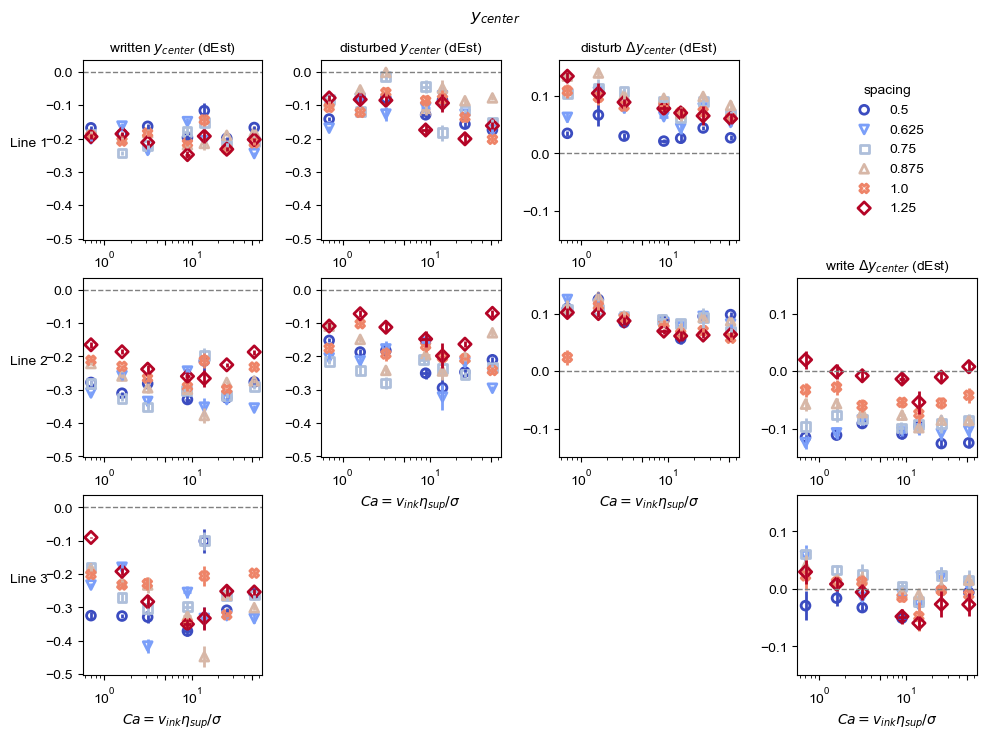

In [558]:
yvl = mp.yvarlines(ms, ms.ss[(ms.ss.date>230214)], xvar='int_Ca', yvar='yc', zvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)

In [530]:
ms.reduceRows('roughness_w3o', ms.ss.date==230920, ms.ss.int_Ca>1, ms.ss.int_Ca<4, yvarmin=0.8);

,ink_shortname,sup_shortname,int_Ca,spacing,roughness_w3o
104,PDMSS12.5,4.0,3.29,0.88,0.90
141,PDMSS7.5,3.5,1.59,1.00,0.93
87,PDMSS12.5,3.5,1.59,1.00,0.99
451,PDMSS8-S85-0.05,3.0,2.98,0.88,1.01
51,PDMSS10,4.0,3.29,1.00,1.20
452,PDMSS8-S85-0.05,3.0,2.98,1.00,1.25
105,PDMSS12.5,4.0,3.29,1.00,1.29
142,PDMSS7.5,3.5,1.59,1.25,1.42
88,PDMSS12.5,3.5,1.59,1.25,1.46
52,PDMSS10,4.0,3.29,1.25,1.55


In [544]:
ms.openFolder(452)

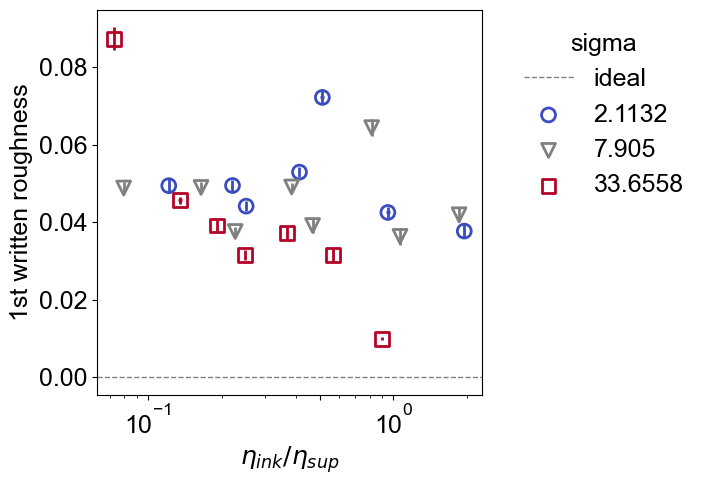

In [522]:
xvar = 'visc0Ratio'
yvar = 'roughness_w1o'
zvar = 'sigma'
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True, logy=False, dx=0.1, figsize=(5,5), zvar=zvar, yideal=me.ideals().yideal(yvar))

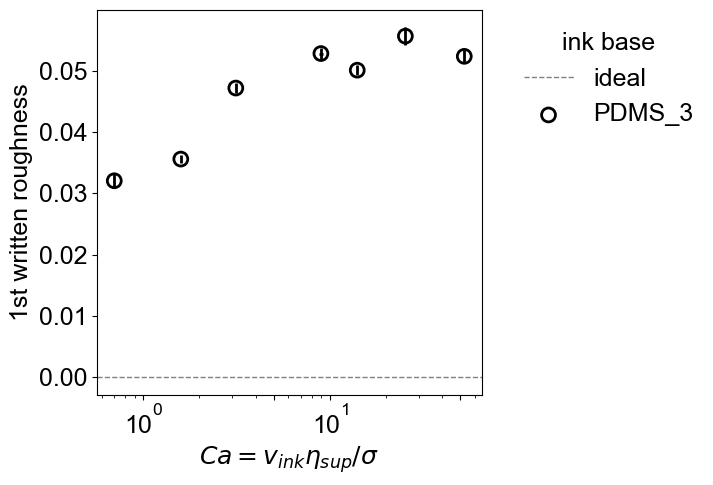

In [485]:
xvar = 'int_Ca'
yvar = 'roughness_w1o'
zvar = 'ink_base'
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True, logy=False, dx=0.15, figsize=(5,5), zvar=zvar, yideal=me.ideals().yideal(yvar))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\images\plots\int_Ca_roughness_w1o.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\images\plots\int_Ca_roughness_w3o.png and .svg


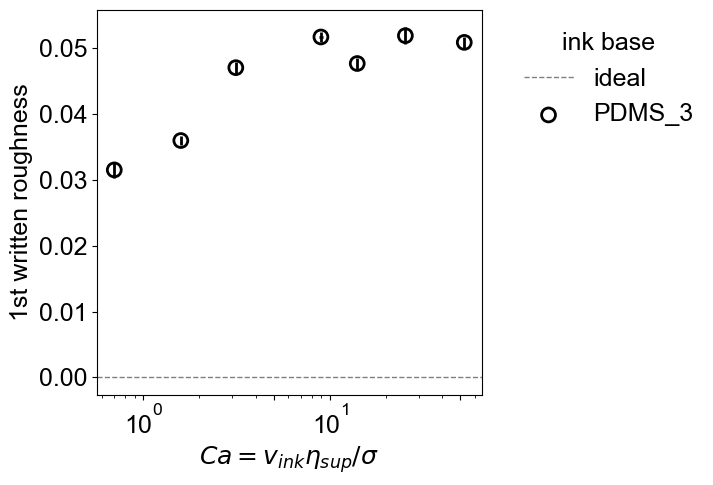

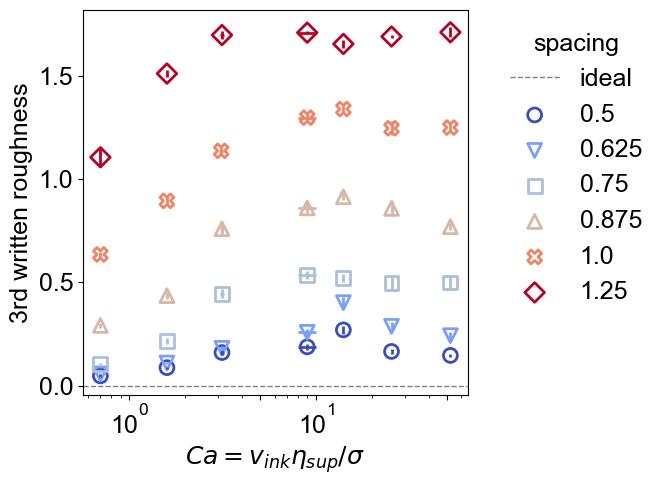

In [524]:
for yvar in ['roughness_w1o', 'roughness_w3o']:
    xvar = 'int_Ca'
    if yvar=='roughness_w1o':
        zvar = 'ink_base'
    else:
        zvar = 'spacing'
    p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True, logy=False, dx=0.15, figsize=(5,5), zvar=zvar, yideal=me.ideals().yideal(yvar))
    p2.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}.svg'))

In [514]:
ms.reduceRows('roughness_w3o', ms.ss.spacing==0.500, ms.ss.int_Ca>10, ms.ss.int_Ca<20);

,ink_shortname,sup_shortname,int_Ca,spacing,roughness_w3o
279,PDMSS9-S20-0.5,3.0,11.16,0.5,0.05
226,PDMSS7-S20-0.5,3.0,11.16,0.5,0.08
373,PDMSS10-S85-0.05,4.0,14.00,0.5,0.11
172,PDMSS5-S20-0.5,3.0,11.16,0.5,0.14
484,PDMSS8-S85-0.05,4.0,14.00,0.5,0.24
430,PDMSS6-S85-0.05,4.0,14.00,0.5,0.45


In [334]:
ms.addRatios(varlist=['visc0'], operator='Ratio')

,visc0Ratio,printFolder,sup_Ca,ink_Ca,sup_dnorma,sup_dnormd,ink_dnorma,ink_dnormd,sup_We,ink_We,...,delta_stdevT_write3_N,delta_minmaxT_write3,delta_minmaxT_write3_SE,delta_minmaxT_write3_N,delta_ldiff_write3,delta_ldiff_write3_SE,delta_ldiff_write3_N,dyflr_w1p,dyflr_w1p_SE,dyflr_w1p_N
0,0.57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,0.70,0.40,0.41,8.64e-03,0.05,1.92e-03,2.78e-03,1.79e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,0.70,0.40,0.41,8.64e-03,0.05,1.92e-03,2.78e-03,1.79e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,0.70,0.40,0.41,8.64e-03,0.05,1.92e-03,2.78e-03,1.79e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,0.70,0.40,0.41,8.64e-03,0.05,1.92e-03,2.78e-03,1.79e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,0.70,0.40,0.41,8.64e-03,0.05,1.92e-03,2.78e-03,1.79e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,0.70,0.40,0.41,8.64e-03,0.05,1.92e-03,2.78e-03,1.79e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,0.70,0.40,0.41,8.64e-03,0.05,1.92e-03,2.78e-03,1.79e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,0.70,0.40,0.41,8.64e-03,0.05,1.92e-03,2.78e-03,1.79e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,0.70,0.40,0.41,8.64e-03,0.05,1.92e-03,2.78e-03,1.79e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,0.70,0.40,0.41,8.64e-03,0.05,1.92e-03,2.78e-03,1.79e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [518]:
ms.openFolder(373)

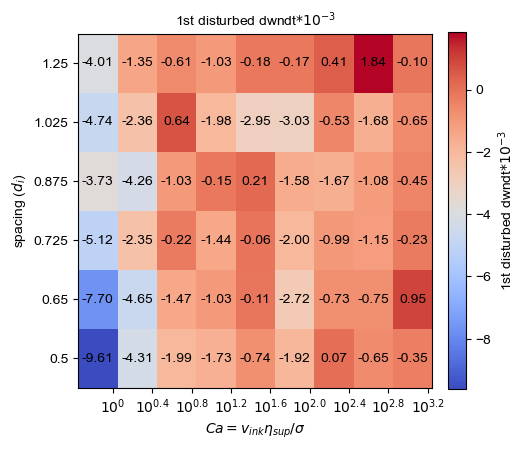

In [302]:
xvar = 'int_Ca'
zvar = 'spacing'
yvar = 'dwndt_d1o'
yvl = mp.meshPlot(ms, ms.ss, xvar=xvar, zvar=yvar, yvar=zvar, llist=[1]
             , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar), gradColor=mp.colorModes.discreteZvar
                   , logy=False, logx=True, mode='scatter', dx=0.1, figsize=(5,5), fs=10, rigid=True)
# yvl.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}_{spacing}.png'))

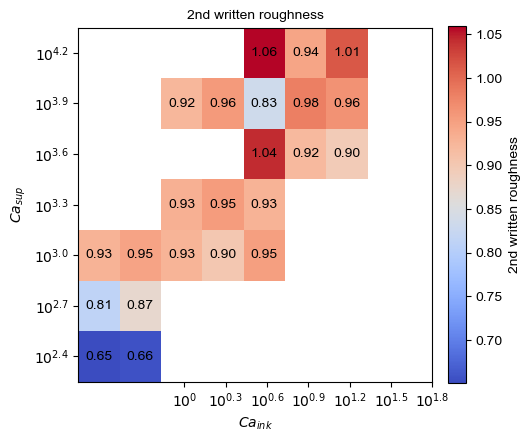

In [261]:
xvar = 'ink_Ca'
zvar = 'sup_Ca'
yvar = 'roughness_w2o'
yvl = mp.meshPlot(ms, ms.ss[ms.ss.spacing==1.250], xvar=xvar, zvar=yvar, yvar=zvar, llist=[1]
             , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar), gradColor=mp.colorModes.discreteZvar
                   , logy=True, logx=True, mode='scatter', dx=0.15, dy=0.15, figsize=(5,5), fs=10, rigid=True)
# yvl.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}_{spacing}.png'))

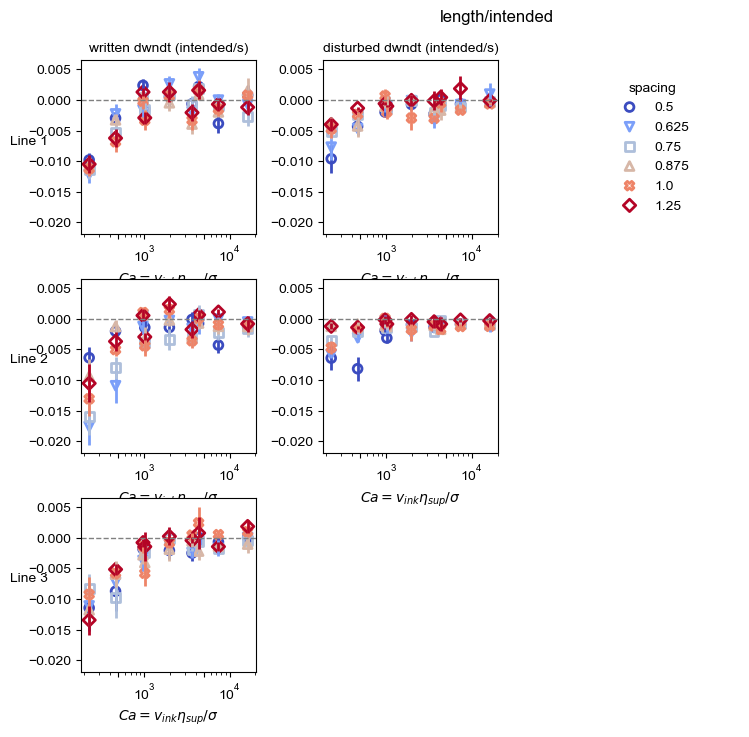

In [161]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='wn', zvar='spacing', llist=[1, 2, 3]
             , plist=['dwdt', 'dddt', 'wp', 'dp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0)

In [232]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.250], 'delta_roughness_write3', logy=False, printOut=True, export=False, package='tabular')

\begin{table}[H]
\centering
\caption[Linear regressions for 3rd write $\Delta$roughness at nonzero surface tension.]{Table of linear regressions of log-scaled x variables and Spearman rank correlations for \textbf{3rd write $\Delta$roughness} at nonzero surface tension. For example, ${Re}_{ink}$ indicates a regression fit to $y = b*log_{10}(Re_{ink}) + c$. A Spearman rank correlation coefficient of -1 or 1 indicates a strong correlation. Variables are defined in table \ref{tab:variableDefs}.}
\label{tab:delta_roughness_write3RegNonZero}
\begin{tabular}{llrrll}
                                         variables &       $r^2$ &     b &     c & Spearman coeff &     Spearman p \\
                       $G'_{ink.a}/\tau_{y.sup.a}$ &        0.06 &  0.06 &  0.67 &           0.32 &        9.6e-02 \\
                         $\tau_{ink.d}/G'_{sup.d}$ &        0.04 &  0.05 &  0.90 &           0.24 &        2.2e-01 \\
                           $G'_{ink.a}/G'_{sup.a}$ &        0.05 &  0.05 &  0.7